In [6]:
# Zadanie 1 Napisz funkcję wstaw_inicjaly(obraz_bazowy, obraz_wstawiany, m, n,
# kolor)

In [7]:
from PIL import Image
import numpy as np
from PIL import ImageChops
from PIL import ImageStat as stat
import matplotlib.pyplot as plt
from random import randint

tryb RGB
format PNG
rozmiar (686, 386)


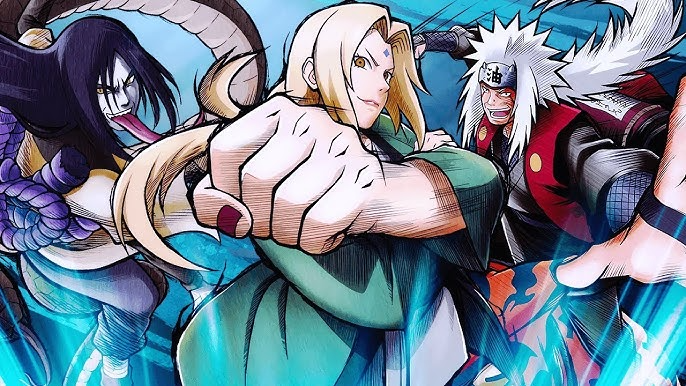

In [8]:
im = Image.open('im.png')
print("tryb", im.mode)
print("format", im.format)
print("rozmiar", im.size)
w_im, h_im = im.size
im

tryb 1
format BMP
rozmiar (71, 45)


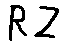

In [9]:
inicjaly_wlasne = Image.open('inicjaly_wlasne.bmp')
print("tryb", inicjaly_wlasne.mode)
print("format", inicjaly_wlasne.format)
print("rozmiar", inicjaly_wlasne.size)
w_in, h_in = inicjaly_wlasne.size
inicjaly_wlasne

In [10]:
def wstaw_inicjaly(obraz_bazowy, obraz_wstawiany, m, n, kolor):
    tab_bazowy = np.array(obraz_bazowy)
    tab_wstawiany = np.asarray(obraz_wstawiany).astype(np.int_)

    h0, w0, color = tab_bazowy.shape
    h1, w1 = tab_wstawiany.shape
    n_k = min(h0, h1+n)
    m_k = min(w0, w1+m)
    n_p = max(0, n)
    m_p = max(0, m)

    tab_wynnik = tab_bazowy
    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            if(tab_wstawiany[i - n, j - m] == 0):
                tab_wynnik[i, j] = kolor

    return Image.fromarray(tab_wynnik)

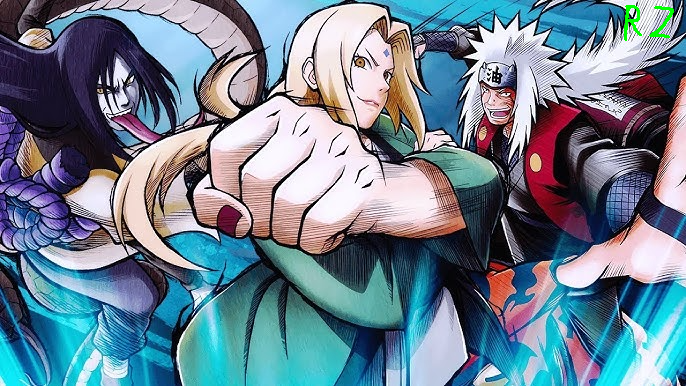

In [11]:
wstaw_inicjaly(im, inicjaly_wlasne, w_im - w_in, 0, (0, 255, 0))

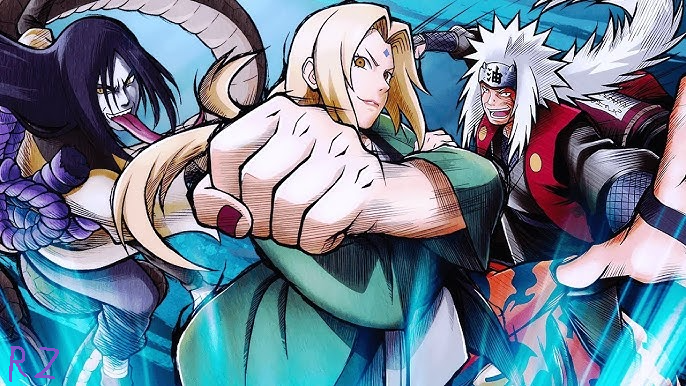

In [12]:
wstaw_inicjaly(im, inicjaly_wlasne, 0, h_im - h_in, (124, 85, 201))

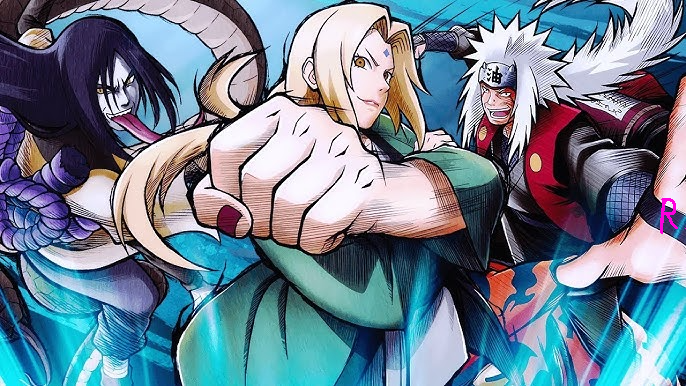

In [13]:
wstaw_inicjaly(im, inicjaly_wlasne, w_im - (w_in // 2), h_im // 2, (255, 0, 221))

In [15]:
# Zadanie 2
# Dla obrazu obraz.png wybranego w zadaniu 1 poprzednich ćwiczeń wykonaj następujące czynności

In [16]:
# a) Wczytaj obraz i zapisz jako obraz1.jpg
obraz = Image.open("im.png")
obraz.save("obraz1.jpg", "JPEG")

In [17]:
# b) Wczytaj obraz1.jpg i zapisz jako obraz2.jpg i powtórz aż otrzymasz obraz5.jpg
for i in range(1, 5):
    obraz = Image.open(f"obraz{i}.jpg")
    obraz.save(f"obraz{i+1}.jpg", "JPEG")

In [20]:
# c) Oceń różnice między obrazem i obraz5.jpg (statystyki, histogramy tych obrazów oraz obrazu, który jest
# ich różnicą (ImageChops.difference(obraz, obraz5)). Przedstaw te obrazy na jednym diagramie plt.

def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

obraz5 = Image.open("obraz5.jpg")

statystyki(obraz)
print("----------------------------------------------------------")
statystyki(obraz5)

extrema  [(0, 255), (0, 255), (0, 255)]
count  [264796, 264796, 264796]
mean  [110.52559328690765, 129.52642789166, 145.5638378223236]
median  [87, 142, 162]
stddev  [88.17471692596466, 82.61712770420888, 81.00676854043884]
----------------------------------------------------------
extrema  [(0, 255), (0, 255), (0, 255)]
count  [264796, 264796, 264796]
mean  [110.56184761099111, 129.53240607864169, 145.57708198009033]
median  [87, 142, 162]
stddev  [88.0851743399241, 82.56996525423105, 80.96713173501318]


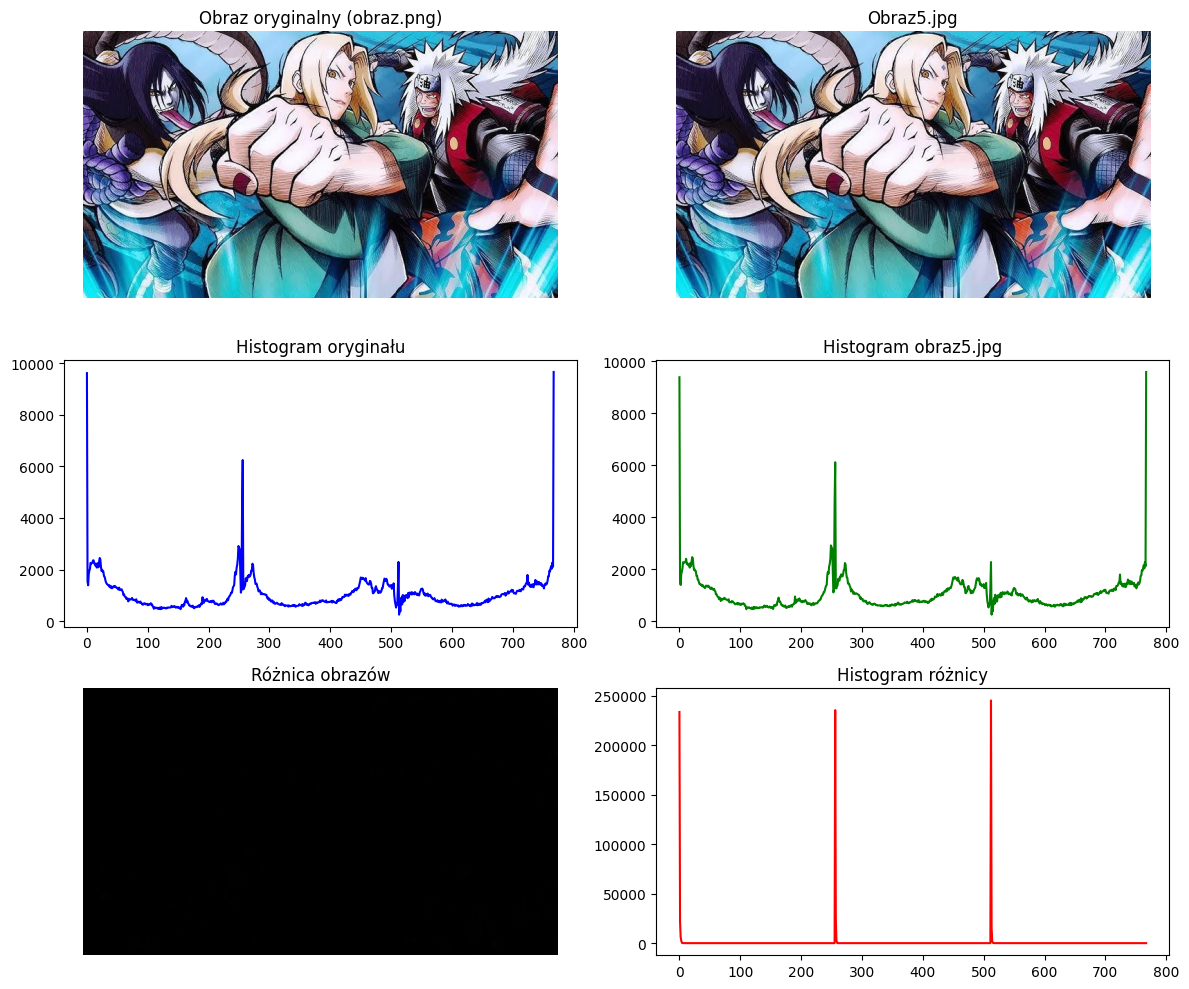

<Figure size 640x480 with 0 Axes>

In [23]:
obraz_hist = obraz.histogram()
obraz5_hist = obraz5.histogram()

difference_image = ImageChops.difference(obraz, obraz5)
difference_hist = difference_image.histogram()

fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Wyświetlanie `obraz.png`
axs[0, 0].imshow(obraz)
axs[0, 0].set_title("Obraz oryginalny (obraz.png)")
axs[0, 0].axis("off")

# Wyświetlanie `obraz5.jpg`
axs[0, 1].imshow(obraz5)
axs[0, 1].set_title("Obraz5.jpg")
axs[0, 1].axis("off")

# Histogramy oryginału i `obraz5.jpg`
axs[1, 0].plot(obraz_hist, color="blue")
axs[1, 0].set_title("Histogram oryginału")
axs[1, 1].plot(obraz5_hist, color="green")
axs[1, 1].set_title("Histogram obraz5.jpg")

# Wyświetlenie różnicy między obrazami
axs[2, 0].imshow(difference_image)
axs[2, 0].set_title("Różnica obrazów")
axs[2, 0].axis("off")

# Histogram różnicy
axs[2, 1].plot(difference_hist, color="red")
axs[2, 1].set_title("Histogram różnicy")

plt.tight_layout()
plt.show()
plt.savefig("wykres1.png")


In [24]:
# d) Oceń różnice między obraz4.jpg i obraz5.jpg
obraz4 = Image.open("obraz4.jpg")
obraz5 = Image.open("obraz5.jpg")

statystyki(obraz4)
print("----------------------------------------------------------")
statystyki(obraz5)

extrema  [(0, 255), (0, 255), (0, 255)]
count  [264796, 264796, 264796]
mean  [110.52559328690765, 129.52642789166, 145.5638378223236]
median  [87, 142, 162]
stddev  [88.17471692596466, 82.61712770420888, 81.00676854043884]
----------------------------------------------------------
extrema  [(0, 255), (0, 255), (0, 255)]
count  [264796, 264796, 264796]
mean  [110.56184761099111, 129.53240607864169, 145.57708198009033]
median  [87, 142, 162]
stddev  [88.0851743399241, 82.56996525423105, 80.96713173501318]


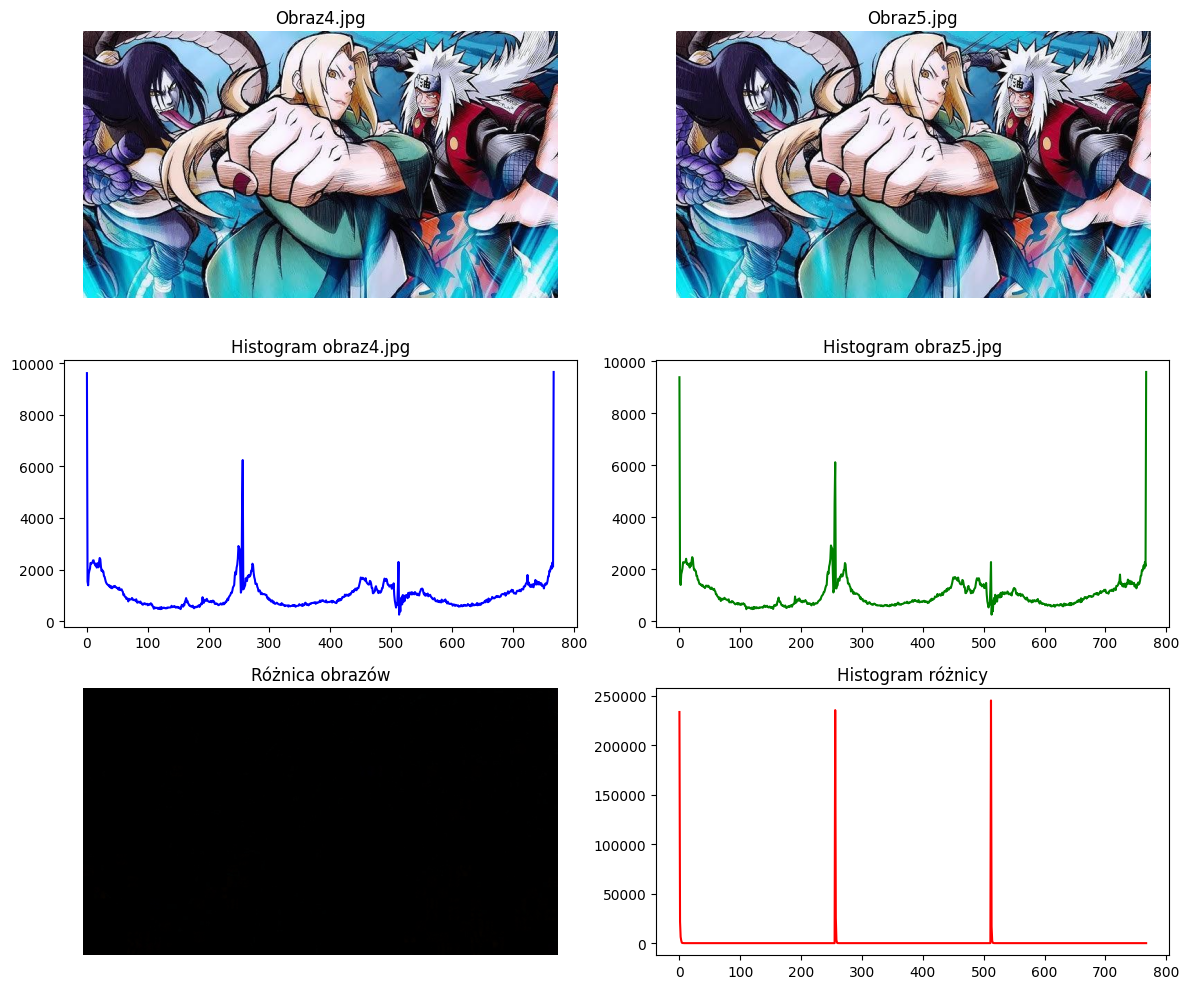

<Figure size 640x480 with 0 Axes>

In [25]:
obraz4_hist = obraz4.histogram()
obraz5_hist = obraz5.histogram()

difference_image = ImageChops.difference(obraz4, obraz5)
difference_hist = difference_image.histogram()

fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Wyświetlanie `obraz.png`
axs[0, 0].imshow(obraz4)
axs[0, 0].set_title("Obraz4.jpg")
axs[0, 0].axis("off")

# Wyświetlanie `obraz5.jpg`
axs[0, 1].imshow(obraz5)
axs[0, 1].set_title("Obraz5.jpg")
axs[0, 1].axis("off")

# Histogramy oryginału i `obraz5.jpg`
axs[1, 0].plot(obraz4_hist, color="blue")
axs[1, 0].set_title("Histogram obraz4.jpg")
axs[1, 1].plot(obraz5_hist, color="green")
axs[1, 1].set_title("Histogram obraz5.jpg")

# Wyświetlenie różnicy między obrazami
axs[2, 0].imshow(difference_image)
axs[2, 0].set_title("Różnica obrazów")
axs[2, 0].axis("off")

# Histogram różnicy
axs[2, 1].plot(difference_hist, color="red")
axs[2, 1].set_title("Histogram różnicy")

plt.tight_layout()
plt.show()
plt.savefig("wykres2.png")

/tmp/ipykernel_7069/1740312249.py:14: RuntimeWarning: overflow encountered in scalar add
  t_kodowany[i, j, k] = t_obraz[i, j, k] + 1


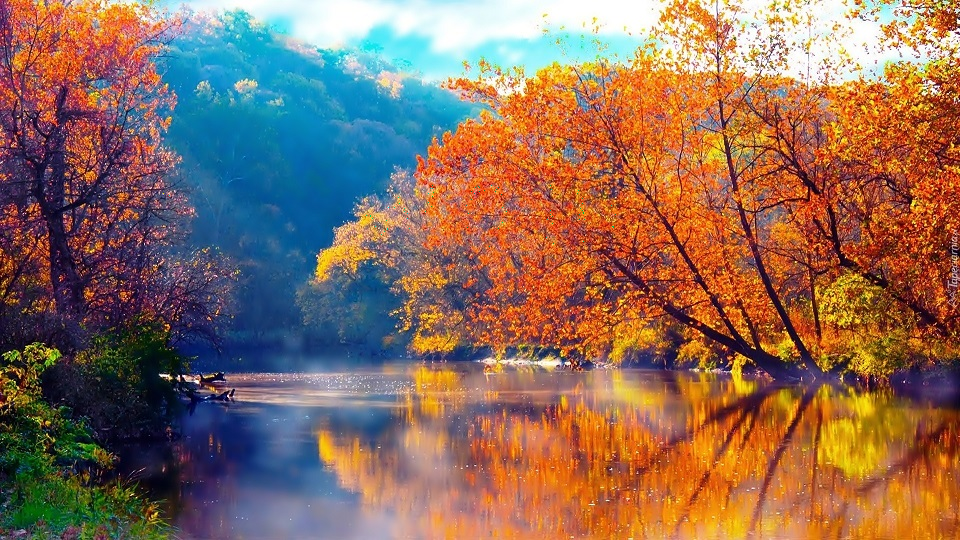

In [33]:
# Zadanie 3
# Obraz zakodowany1.bmp powstał tak, że zastosowałam funkcję ukryj_kod(obraz, im_kod), gdzie obraz jest
# wczytanym obrazem jesien.jpg, a im_kod jest wczytanym obrazem kod.bmp.

def ukryj_kod(obraz, im_kod):
    t_obraz = np.asarray(obraz)
    t_kodowany = t_obraz.copy()
    h, w, d = t_obraz.shape
    t_kod = np.asarray(im_kod)
    for i in range(h):
        for j in range(w):
            if t_kod[i, j] > 0:
                k = randint(0,2)
                t_kodowany[i, j, k] = t_obraz[i, j, k] + 1
    return Image.fromarray(t_kodowany)

jesien = Image.open("jesien.jpg")
kod = Image.open("kod.bmp")

im_kodowany = ukryj_kod(jesien, kod)
im_kodowany

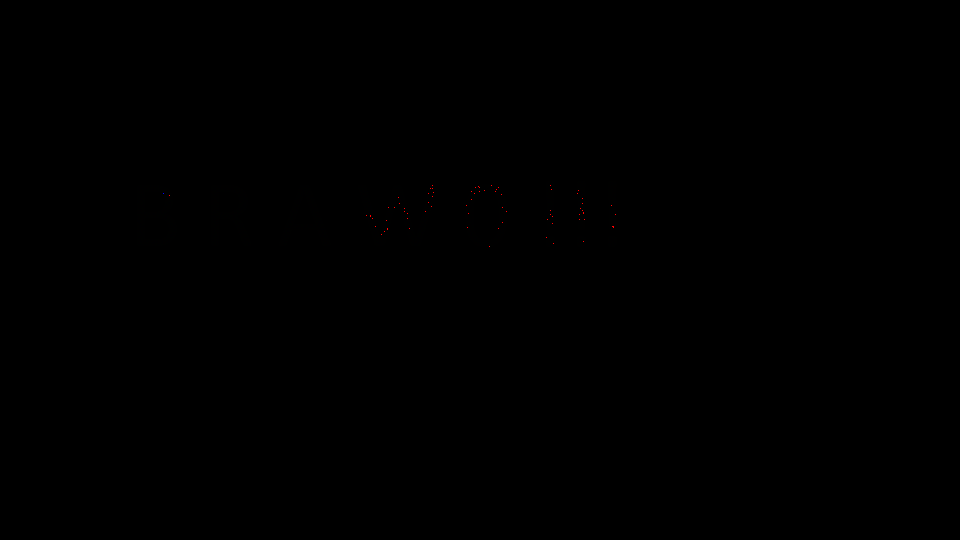

In [34]:
odkodowany = ImageChops.difference(jesien, im_kodowany)
odkodowany

In [35]:
# a) Napisz funkcję odkoduj(obraz1, obraz2), która wczytuje dwa obrazy, a na wyjściu podaje obraz w
# trybie L ilustrujący różnice w ten sposób, że piksele różne wyświetlają się na biało a piksele równe na
# czarno. Na przykład, wczytujemy jesien.jpg oraz zakodowany1.bmp a wynikiem funkcji jest kod.bmp.

In [36]:
def odkoduj(obraz1, obraz2):
    t_obraz1 = np.array(obraz1)
    t_obraz2 = np.array(obraz2)
    h, w, d = t_obraz1.shape
    t = (h, w)
    t_odkodowany = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if(t_obraz1[i, j][0] != t_obraz2[i, j][0] or t_obraz1[i, j][1] != t_obraz2[i, j][1] or t_obraz1[i, j][2] != t_obraz2[i, j][2]):
                t_odkodowany[i, j] = 255
    return Image.fromarray(t_odkodowany)

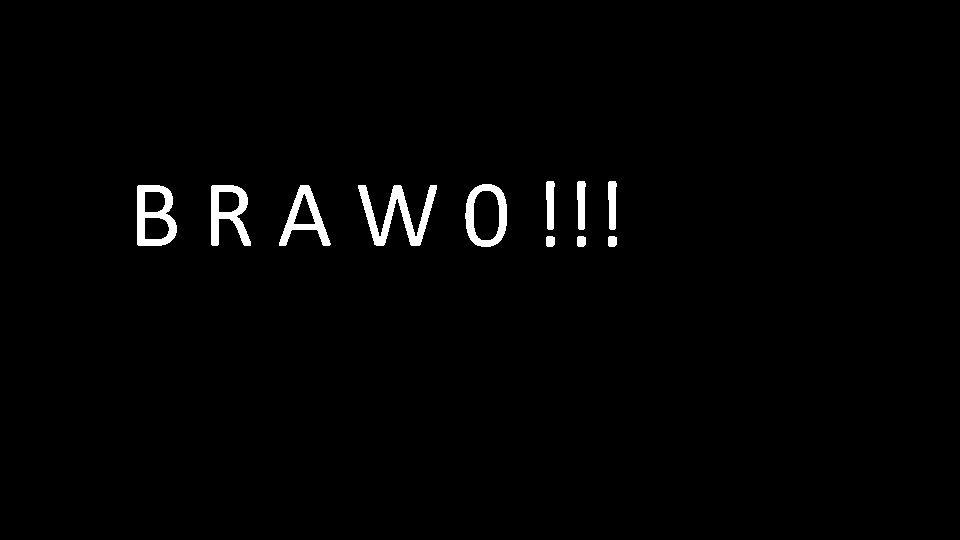

In [41]:
zakodowany1 = Image.open("zakodowany1.bmp")
odkoduj(jesien, zakodowany1)

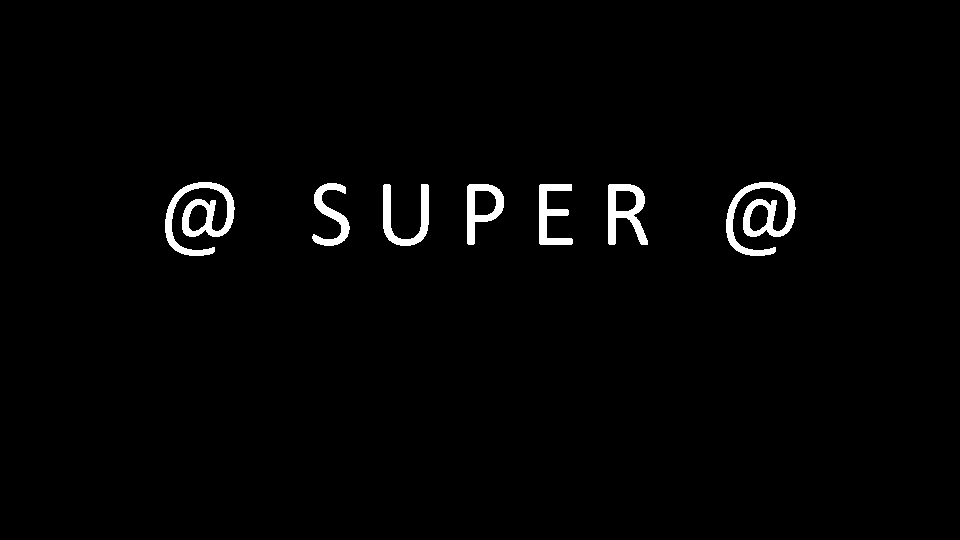

In [42]:
zakodowany2 = Image.open("zakodowany2.bmp")

odkoduj(jesien, zakodowany2).save("kod2.bmp", "bmp")
odkoduj(jesien, zakodowany2)